# Lab 7

In [5]:
%pip install pandas matplotlib seaborn scipy ydata-profiling setuptools ipywidgets
%pip install -U scikit-learn==1.4.0
%pip install -U pip
%pip install -U setuptools wheel
%pip install autogluon
%pip install --upgrade setuptools
%pip install bokeh==2.0.1

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 10.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080017 sha256=47d2890ef5234ad87976a49130e331d542abe97ba51ae17cc5c82e283ca25394
  Stored in directory: /home/diggspapu/.cache/pip/wheels/0e/c4/ce/fecee9e6406e166eaba4e09b1acd2096a84ffef5275ea90806
Successfully built bokeh
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


## Load the DF

In [1]:
import pandas as pd

# Load the file 'insurance' into a dataframe
df_insurance = pd.read_csv('insurance.csv')
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

In [2]:
# Obtener estadísticas descriptivas básicas del conjunto de datos
df_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


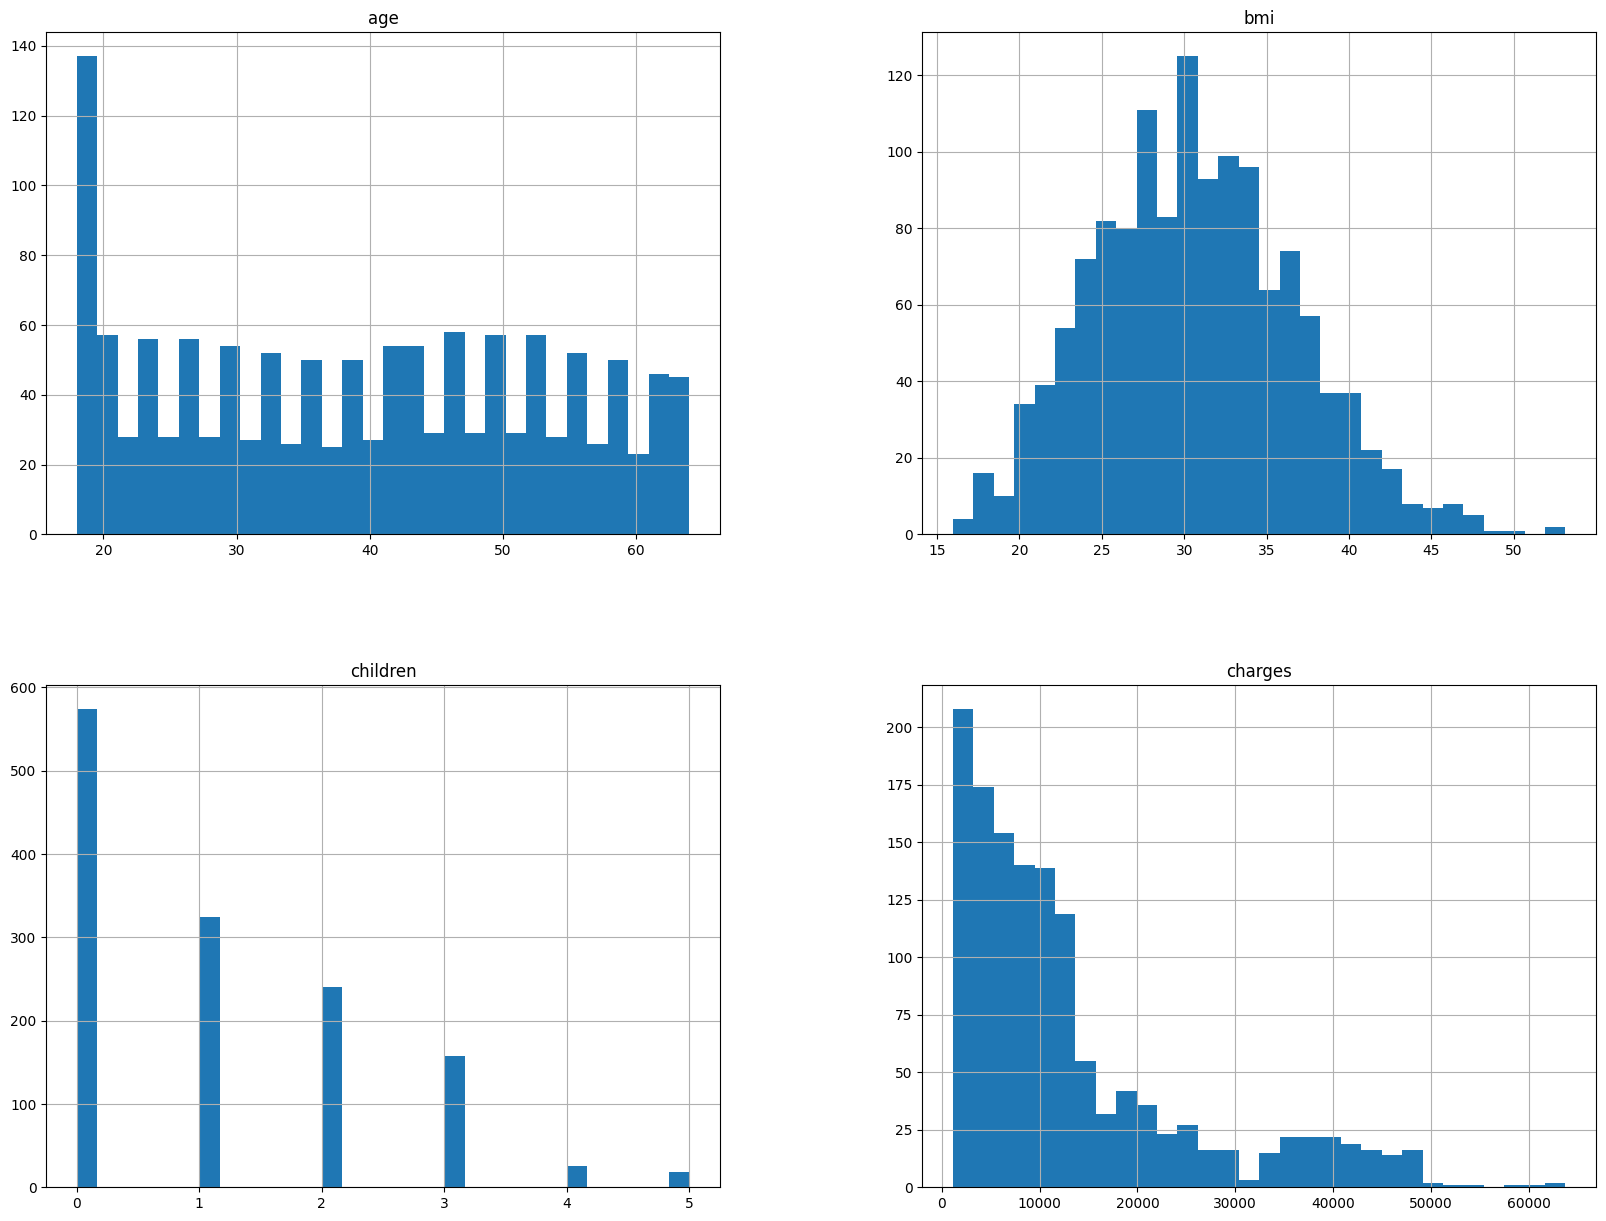

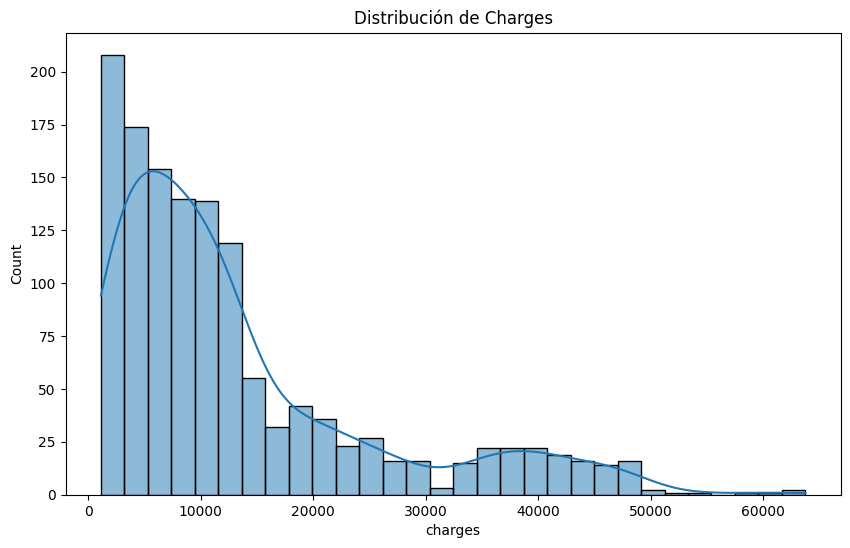

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


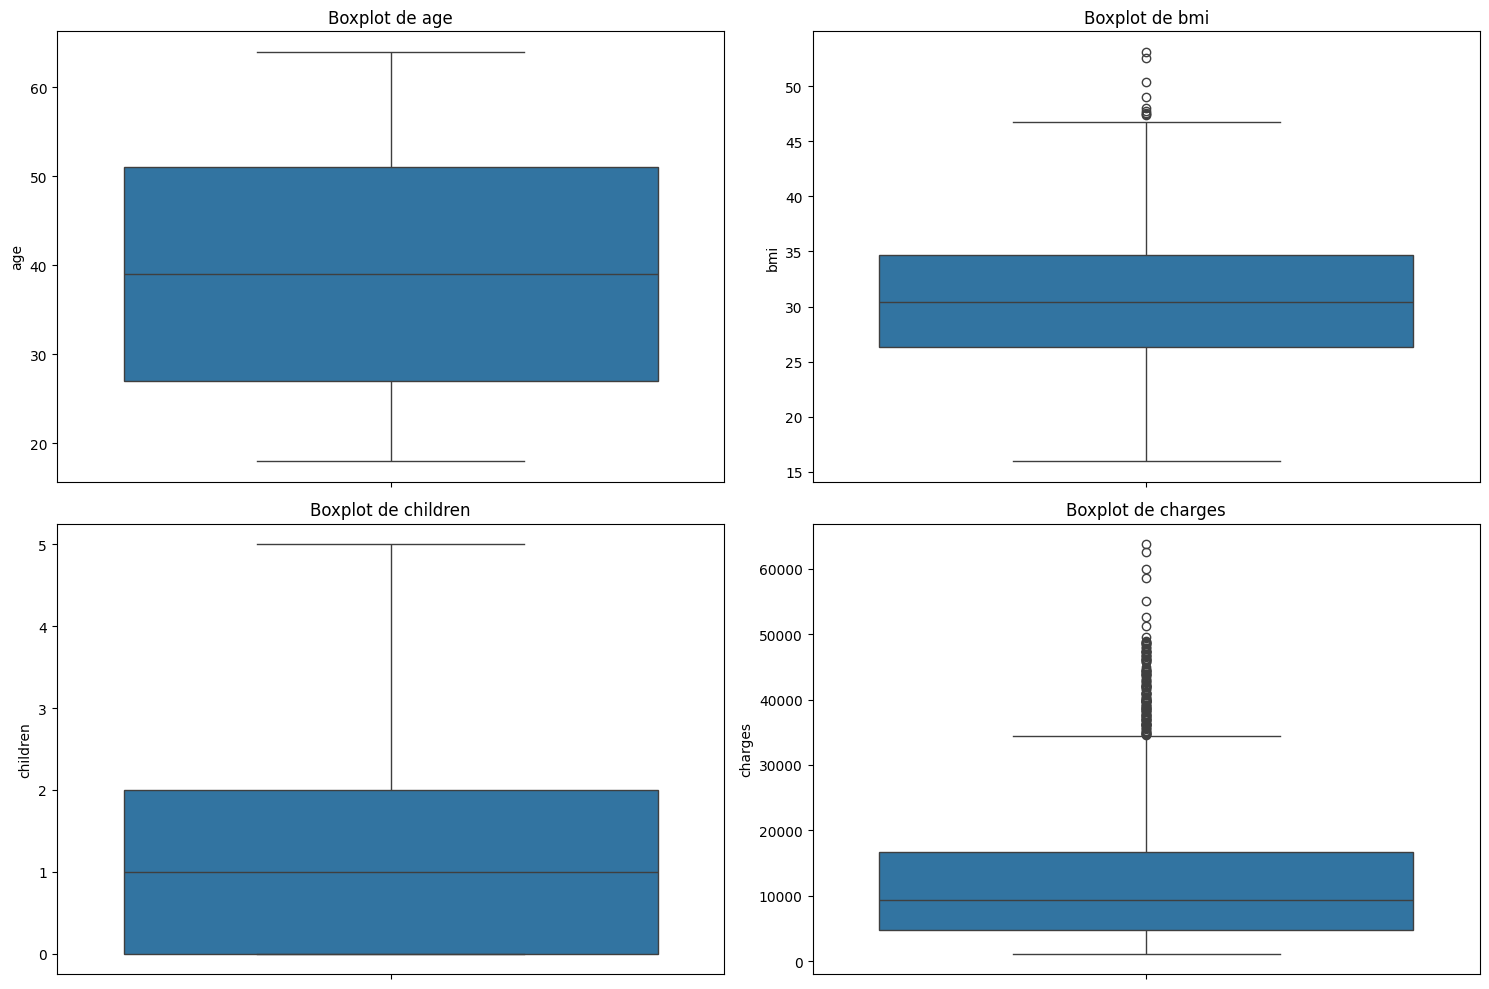

In [3]:
import seaborn as sns
# Visualizar la distribución de las variables
import matplotlib.pyplot as plt

# Histograma de todas las variables numéricas
df_insurance.hist(bins=30, figsize=(20, 15))
plt.show()

# Distribución de la variable 'charges'
plt.figure(figsize=(10, 6))
sns.histplot(df_insurance['charges'], kde=True)
plt.title('Distribución de Charges')
plt.show()

# Verificar la presencia de valores nulos
print(df_insurance.isnull().sum())

# Verificar la presencia de valores atípicos usando boxplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(['age', 'bmi', 'children', 'charges'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df_insurance[column])
    plt.title(f'Boxplot de {column}')
plt.tight_layout()
plt.show()

In [4]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_insurance, title="Data Profiling Report", explorative=True)

# Export the report to an HTML file
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

El problema en realidad no es de predicción de la diabetes si no probablemente predicción de qué tan caro es el aseguramiento, por ende, en vez de ser un problema de clasificación es uno de regresión. Se intentó clasificar y usar accuracy, sin embargo, ningún modelo se lograba entrenar ya que de eso no va el dataset, por lo que se realizará una regresión con una evaluación de rmse

In [2]:
from autogluon.tabular import TabularPredictor
# Verify the columns in the dataframe
print(df_insurance.columns)

# Assuming 'charges' is the target variable, update the label accordingly
predictor = TabularPredictor(label='charges', problem_type="regression", eval_metric='rmse').fit(
    train_data=df_insurance, 
    presets='best_quality',
    verbosity=2
)

# Mostrar el resumen del entrenamiento
predictor.fit_summary()

No path specified. Models will be saved in: "AutogluonModels/ag-20240928_135018"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.0
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Mar 29 23:14:13 UTC 2024
CPU Count:          16
Memory Avail:       5.58 GB / 7.38 GB (75.5%)
Disk Space Avail:   919.21 GB / 1006.85 GB (91.3%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


	Running DyStack sub-fit in a ray process to avoid memory leakage. Enabling ray logging (enable_ray_logging=True). Specify `ds_args={'enable_ray_logging': False}` if you experience logging issues.
2024-09-28 07:50:24,614	INFO worker.py:1743 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 
		Context path: "AutogluonModels/ag-20240928_135018/ds_sub_fit/sub_fit_ho"
(_dystack pid=10633) Running DyStack sub-fit ...
(_dystack pid=10633) Beginning AutoGluon training ... Time limit = 894s
(_dystack pid=10633) AutoGluon will save models to "AutogluonModels/ag-20240928_135018/ds_sub_fit/sub_fit_ho"
(_dystack pid=10633) Train Data Rows:    1189
(_dystack pid=10633) Train Data Columns: 6
(_dystack pid=10633) Label Column:       charges
(_dystack pid=10633) Problem Type:       regression
(_dystack pid=10633) Preprocessing data ...
(_dystack pid=10633) Using Feature Generators to preprocess the data ...
(_dystack pid=10633) Fitting AutoMLPipelineFeatureGenerator...
(_dystack pi

(_ray_fit pid=16456) [1000]	valid_set's rmse: 4543.75


(_dystack pid=10633) 	-4776.5928	 = Validation score   (-root_mean_squared_error)
(_dystack pid=10633) 	1.49s	 = Training   runtime
(_dystack pid=10633) 	0.08s	 = Validation runtime
(_dystack pid=10633) Fitting model: NeuralNetFastAI_r191_BAG_L1 ... Training model for up to 527.95s of the 825.91s of remaining time.
(_dystack pid=10633) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=0.01%)
(_dystack pid=10633) 	-4760.9774	 = Validation score   (-root_mean_squared_error)
(_dystack pid=10633) 	10.0s	 = Training   runtime
(_dystack pid=10633) 	0.14s	 = Validation runtime
(_dystack pid=10633) Fitting model: CatBoost_r9_BAG_L1 ... Training model for up to 515.23s of the 813.19s of remaining time.
(_dystack pid=10633) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=0.39%)
(_dystack pid=10633) 	-4561.1052	 = Validation score   (-root_mean_

(_ray_fit pid=18151) [1000]	valid_set's rmse: 4581.76 [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)


(_dystack pid=10633) 	-4605.2545	 = Validation score   (-root_mean_squared_error)
(_dystack pid=10633) 	1.44s	 = Training   runtime
(_dystack pid=10633) 	0.14s	 = Validation runtime
(_dystack pid=10633) Fitting model: NeuralNetTorch_r22_BAG_L1 ... Training model for up to 505.57s of the 803.53s of remaining time.
(_dystack pid=10633) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=0.01%)
(_dystack pid=10633) 	-4613.7029	 = Validation score   (-root_mean_squared_error)
(_dystack pid=10633) 	13.85s	 = Training   runtime
(_dystack pid=10633) 	0.07s	 = Validation runtime
(_dystack pid=10633) Fitting model: XGBoost_r33_BAG_L1 ... Training model for up to 489.68s of the 787.64s of remaining time.
(_dystack pid=10633) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=0.45%)
(_dystack pid=10633) 	-5485.7725	 = Validation score   (-root_mean_s

(_ray_fit pid=28272) [1000]	valid_set's rmse: 4921.67 [repeated 29x across cluster]


(_dystack pid=10633) 	-4857.52	 = Validation score   (-root_mean_squared_error)
(_dystack pid=10633) 	1.53s	 = Training   runtime
(_dystack pid=10633) 	0.08s	 = Validation runtime
(_dystack pid=10633) Fitting model: NeuralNetFastAI_r143_BAG_L1 ... Training model for up to 354.5s of the 652.46s of remaining time.
(_dystack pid=10633) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=0.01%)
(_dystack pid=10633) 	-4890.1005	 = Validation score   (-root_mean_squared_error)
(_dystack pid=10633) 	4.42s	 = Training   runtime
(_dystack pid=10633) 	0.09s	 = Validation runtime
(_dystack pid=10633) Fitting model: CatBoost_r70_BAG_L1 ... Training model for up to 347.5s of the 645.46s of remaining time.
(_dystack pid=10633) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=0.19%)
(_dystack pid=10633) 	-4510.7338	 = Validation score   (-root_mean_squ

(_ray_fit pid=30574) [1000]	valid_set's rmse: 6742.31 [repeated 3x across cluster]


(_dystack pid=10633) 	-4596.4062	 = Validation score   (-root_mean_squared_error)
(_dystack pid=10633) 	2.96s	 = Training   runtime
(_dystack pid=10633) 	0.36s	 = Validation runtime
(_dystack pid=10633) Fitting model: RandomForest_r39_BAG_L1 ... Training model for up to 318.67s of the 616.64s of remaining time.
(_dystack pid=10633) 	-4607.5129	 = Validation score   (-root_mean_squared_error)
(_dystack pid=10633) 	0.95s	 = Training   runtime
(_dystack pid=10633) 	0.11s	 = Validation runtime
(_dystack pid=10633) Fitting model: CatBoost_r167_BAG_L1 ... Training model for up to 316.67s of the 614.63s of remaining time.
(_dystack pid=10633) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=0.12%)
(_dystack pid=10633) 	-4519.7496	 = Validation score   (-root_mean_squared_error)
(_dystack pid=10633) 	1.79s	 = Training   runtime
(_dystack pid=10633) 	0.02s	 = Validation runtime
(_dystack pid=10633) Fitting model: Neura

(_ray_fit pid=38012) [1000]	valid_set's rmse: 5291.66 [repeated 42x across cluster]


(_dystack pid=10633) 	-4596.8819	 = Validation score   (-root_mean_squared_error)
(_dystack pid=10633) 	0.65s	 = Training   runtime
(_dystack pid=10633) 	0.06s	 = Validation runtime
(_dystack pid=10633) Fitting model: NeuralNetTorch_r143_BAG_L1 ... Training model for up to 190.24s of the 488.2s of remaining time.
(_dystack pid=10633) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=0.01%)
(_dystack pid=10633) 	-4648.8929	 = Validation score   (-root_mean_squared_error)
(_dystack pid=10633) 	19.46s	 = Training   runtime
(_dystack pid=10633) 	0.09s	 = Validation runtime
(_dystack pid=10633) Fitting model: CatBoost_r128_BAG_L1 ... Training model for up to 168.75s of the 466.71s of remaining time.
(_dystack pid=10633) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=0.22%)
(_dystack pid=10633) 	-4609.1131	 = Validation score   (-root_mean

(_ray_fit pid=42148) [1000]	valid_set's rmse: 3963.19 [repeated 6x across cluster]


(_dystack pid=10633) 	-4584.0972	 = Validation score   (-root_mean_squared_error)
(_dystack pid=10633) 	1.05s	 = Training   runtime
(_dystack pid=10633) 	0.06s	 = Validation runtime
(_dystack pid=10633) Fitting model: XGBoost_r49_BAG_L1 ... Training model for up to 117.68s of the 415.65s of remaining time.
(_dystack pid=10633) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=0.17%)
(_dystack pid=10633) 	-5037.124	 = Validation score   (-root_mean_squared_error)
(_dystack pid=10633) 	1.9s	 = Training   runtime
(_dystack pid=10633) 	0.06s	 = Validation runtime
(_dystack pid=10633) Fitting model: CatBoost_r5_BAG_L1 ... Training model for up to 113.73s of the 411.69s of remaining time.
(_dystack pid=10633) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=0.02%)
(_dystack pid=10633) 	-4510.272	 = Validation score   (-root_mean_squared_erro

(_ray_fit pid=50630) [1000]	valid_set's rmse: 6664.09 [repeated 2x across cluster]


(_dystack pid=10633) 	-5040.7225	 = Validation score   (-root_mean_squared_error)
(_dystack pid=10633) 	2.59s	 = Training   runtime
(_dystack pid=10633) 	0.11s	 = Validation runtime
(_dystack pid=10633) Fitting model: NeuralNetFastAI_r172_BAG_L1 ... Training model for up to 4.62s of the 302.58s of remaining time.
(_dystack pid=10633) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=0.01%)
(_dystack pid=10633) 	-4831.2489	 = Validation score   (-root_mean_squared_error)
(_dystack pid=10633) 	5.05s	 = Training   runtime
(_dystack pid=10633) 	0.1s	 = Validation runtime
(_dystack pid=10633) Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 294.71s of remaining time.
(_dystack pid=10633) 	Ensemble Weights: {'XGBoost_BAG_L1': 0.25, 'NeuralNetTorch_r86_BAG_L1': 0.25, 'NeuralNetTorch_r158_BAG_L1': 0.25, 'LightGBM_r130_BAG_L1': 0.083, 'NeuralNetTorch_r41_BAG_L1': 0.042, 'NeuralNetFastAI_r134

(_ray_fit pid=58498) [1000]	valid_set's rmse: 4279.24 [repeated 9x across cluster]


(_dystack pid=10633) 	-4501.4208	 = Validation score   (-root_mean_squared_error)
(_dystack pid=10633) 	1.21s	 = Training   runtime
(_dystack pid=10633) 	0.05s	 = Validation runtime
(_dystack pid=10633) Fitting model: NeuralNetTorch_r22_BAG_L2 ... Training model for up to 83.15s of the 82.93s of remaining time.
(_dystack pid=10633) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=0.06%)
(_dystack pid=10633) 	-4506.3168	 = Validation score   (-root_mean_squared_error)
(_dystack pid=10633) 	12.58s	 = Training   runtime
(_dystack pid=10633) 	0.61s	 = Validation runtime
(_dystack pid=10633) Fitting model: XGBoost_r33_BAG_L2 ... Training model for up to 68.16s of the 67.94s of remaining time.
(_dystack pid=10633) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=2, gpus=0, memory=7.54%)
(_dystack pid=10633) 	-4608.2526	 = Validation score   (-root_mean_squar

*** Summary of fit() ***
Estimated performance of each model:
                           model     score_val              eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0            WeightedEnsemble_L2  -4403.135106  root_mean_squared_error       0.499437  65.843274                0.000463           0.023444            2       True        109
1            CatBoost_r49_BAG_L1  -4467.462893  root_mean_squared_error       0.021932   1.400445                0.021932           1.400445            1       True         53
2             CatBoost_r5_BAG_L1  -4468.303261  root_mean_squared_error       0.017303   1.712567                0.017303           1.712567            1       True         69
3             CatBoost_r6_BAG_L1  -4482.864970  root_mean_squared_error       0.020943   1.151881                0.020943           1.151881            1       True         83
4           CatBoost_r137_BAG_L1  -4488.596040  root_mean_

/home/diggspapu/data-science/.venv/lib/python3.11/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_r177_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetTorch_r79_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBM_r131_BAG_L1': 'StackerEnsembleModel_LGB',
  'NeuralNetFastAI_r191_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'CatBoost_r9_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'LightGBM_r96_BAG_L1': 'StackerEnsembleModel

In [3]:
from autogluon.tabular import TabularPredictor

# Cargar el predictor guardado
loaded_predictor = TabularPredictor.load("AutogluonModels/ag-20240928_135018")


In [4]:
loaded_predictor.leaderboard()

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-4403.135106,root_mean_squared_error,0.499437,65.843274,0.000463,0.023444,2,True,109
1,CatBoost_r49_BAG_L1,-4467.462893,root_mean_squared_error,0.021932,1.400445,0.021932,1.400445,1,True,53
2,CatBoost_r5_BAG_L1,-4468.303261,root_mean_squared_error,0.017303,1.712567,0.017303,1.712567,1,True,69
3,CatBoost_r6_BAG_L1,-4482.864970,root_mean_squared_error,0.020943,1.151881,0.020943,1.151881,1,True,83
4,CatBoost_r137_BAG_L1,-4488.596040,root_mean_squared_error,0.018839,2.215268,0.018839,2.215268,1,True,21
...,...,...,...,...,...,...,...,...,...,...
104,NeuralNetFastAI_r65_BAG_L1,-5653.247801,root_mean_squared_error,0.106685,4.973497,0.106685,4.973497,1,True,65
105,XGBoost_r98_BAG_L1,-5682.910979,root_mean_squared_error,0.167200,7.156816,0.167200,7.156816,1,True,47
106,XGBoost_r34_BAG_L1,-6276.217356,root_mean_squared_error,0.151617,2.839639,0.151617,2.839639,1,True,105
107,KNeighborsUnif_BAG_L1,-12328.675814,root_mean_squared_error,0.117545,0.069131,0.117545,0.069131,1,True,1
